In [71]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date
import calendar
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline  

In [147]:
df = pd.read_csv('cleaned_sales+weather_data.csv')
df = df.drop('Unnamed: 0' , 1)

In [148]:
df['date'] = df['date'].map( lambda x: datetime.strptime( x, '%Y-%m-%d'))
df['weekofyear'] = df['date'].dt.weekofyear
df['month'] = df['date'].dt.month

In [149]:
df['weekday'] = df['date'].dt.weekday
df['dayofyear'] = df['date'].dt.dayofyear
df['station'] = df['station'].map( int )
df['year'] = df['date'].dt.year

In [150]:
# filter
df = df[df['oms'] > 0 ]
df[:10]

,EAN,Produkttekst,avance,chain_store,date,oms,postal_no,store_name,store_no,volume,station,temp,wind,sun,precipitations,weekofyear,month,weekday,dayofyear,year
0,5741000116975,Royal B X-mas 6x33ds,1,DagliBrugsen,2015-01-01,31.00,2300,COOP DAGLIBR BRYDES ALLE,1043,1,618800,5.5,6.1,0,1.9,1,1,3,1,2015
1,5741000131084,Royal Export 6x33 ds,-13,DagliBrugsen,2015-01-01,100.00,2300,COOP DAGLIBR BRYDES ALLE,1043,4,618800,5.5,6.1,0,1.9,1,1,3,1,2015
2,5741000140284,ROYAL PLATINUM 6-PAK,8,DagliBrugsen,2015-01-01,39.95,2300,COOP DAGLIBR BRYDES ALLE,1043,1,618800,5.5,6.1,0,1.9,1,1,3,1,2015
3,5741000131084,Royal Export 6x33 ds,17,DagliBrugsen,2015-01-01,79.90,2400,COOP DAGLIBR BISPEPARKEN,1053,2,618800,5.5,6.1,0,1.9,1,1,3,1,2015
4,5741000132463,Royal Exp. kuffert24,-19,DagliBrugsen,2015-01-01,299.85,2650,COOP LOKALBR FJELDSTEDVEJ,1082,3,618800,5.5,6.1,0,1.9,1,1,3,1,2015
5,5741000116494,Royal Class. 6x33 ds,10,DagliBrugsen,2015-01-01,40.95,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,1,618800,5.5,6.1,0,1.9,1,1,3,1,2015
6,5741000117958,Royal Plsnr 6x33 ds,10,DagliBrugsen,2015-01-01,40.95,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,1,618800,5.5,6.1,0,1.9,1,1,3,1,2015
7,5741000131077,Royal Export ds,7,DagliBrugsen,2015-01-01,24.00,2500,COOP LOKALBR HERMAN BANGS PLAD,1134,2,618800,5.5,6.1,0,1.9,1,1,3,1,2015
8,5741000132463,Royal Exp. kuffert24,-13,DagliBrugsen,2015-01-01,199.90,2610,COOP DAGLIBRUGSEN ISLEV TORV,1194,2,618800,5.5,6.1,0,1.9,1,1,3,1,2015
9,5741000135013,HEINEKEN KUFFERT,-13,DagliBrugsen,2015-01-01,199.90,2610,COOP DAGLIBRUGSEN ISLEV TORV,1194,2,618800,5.5,6.1,0,1.9,1,1,3,1,2015


## quick overview of the sales over time

let's have a look to the periodic patterns in the data

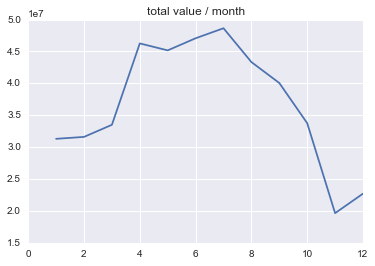

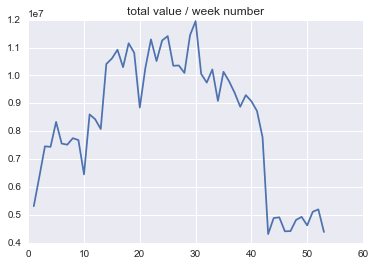

In [151]:
agg_month_value = df.groupby('month')['oms'].sum()
plt.plot(agg_month_value.index.values , agg_month_value.values )
plt.title("total value / month")
plt.show()
agg_week_value = df.groupby('weekofyear')['oms'].sum()
plt.plot(agg_week_value.index.values , agg_week_value.values )
plt.title("total value / week number")
plt.show()

Sales are much highier during summer

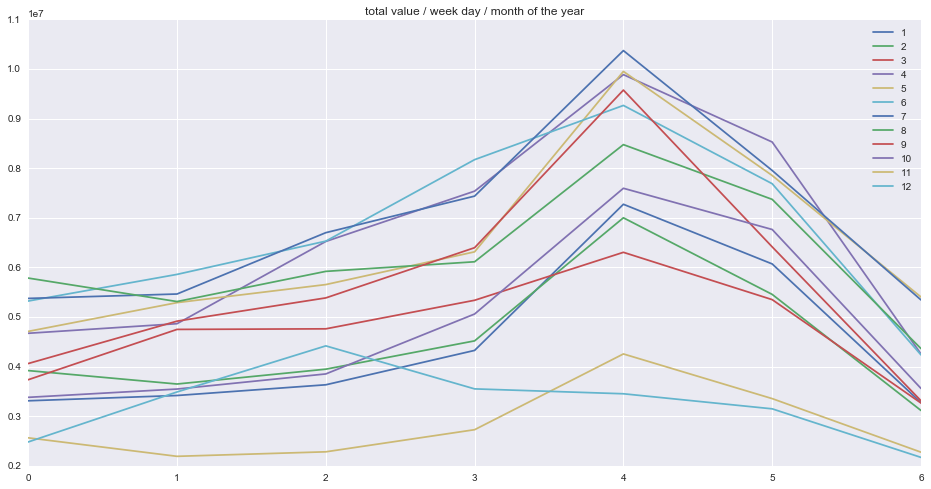

In [161]:
plt.figure(figsize=(16,8))
for m in set(df['month']):
    x = df[ df['month'] == m ]
    agg = x.groupby('weekday')['oms'].sum()
    plt.plot(agg.index.values , agg.values , label=m)

plt.legend()
plt.title('total value / week day / month of the year')
plt.show()

People seem to drink more on Friday, independently of the month (except for December)

## Sales per station

* Region 1 + 2, KBH NORD/SYD: 0618800 Sjælsmark
* Region 3, Sjælland: 0617400 Tessebølle
* Region 5, Fyn: 0612600 Årslev
* Region 6, Vest/syd Jylland: 6116 Store Jyndevad
* Region 7, Østjylland: 0607200 Ødum
* Region 8, Kronjylland: 0606500 Års Syd 
* Region 9, Nordjylland: 0603100 Tylstrup

In [162]:
set(df['station'])

{603100, 607200, 612600, 617400, 618800}

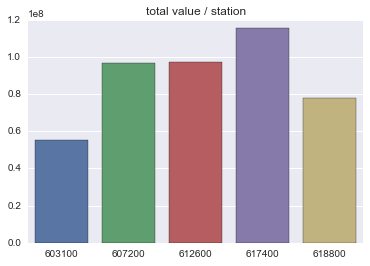

In [163]:
agg = df.groupby('station')['oms'].sum()
sns.barplot(agg.index.values , agg.values )
plt.title("total value / station")
plt.show()

KBH is not the most valuable area

## Aggregate the data per day and station

In [186]:
features = ['oms','date','temp','sun','wind','precipitations', 'dayofyear','year','month','weekday', 'station']
q = df[features]
data = q#[ (q['month'] > 3) & (q['month'] < 10 ) ] #& (q['weekday'] == 4)]
# aggregate emp	wind	sun	precipitations
agg = data.groupby(['date', 'station' ])
aggregated_data = pd.DataFrame( { 'month' :  agg['month'].first() , 'weekday' :  agg['weekday'].first(), 'oms' : agg['oms'].sum(), 'temp':agg['temp'].first() , 'sun' : agg['sun'].first(), 'wind' : agg['wind'].first(),  'precipitations' : agg['precipitations'].first()  } )
aggregated_data.reset_index(level=0, inplace=True)
aggregated_data.reset_index(level=0, inplace=True)

aggregated_data[:3]

,station,date,month,oms,precipitations,sun,temp,weekday,wind
0,603100,2015-01-01,1,22080.76,4.5,0,6.7,3,8.7
1,607200,2015-01-01,1,36691.96,1.0,0,6.8,3,5.7
2,612600,2015-01-01,1,28939.93,0.3,0,5.4,3,8.6


## Let's focus to one area

### What's a good sales day?

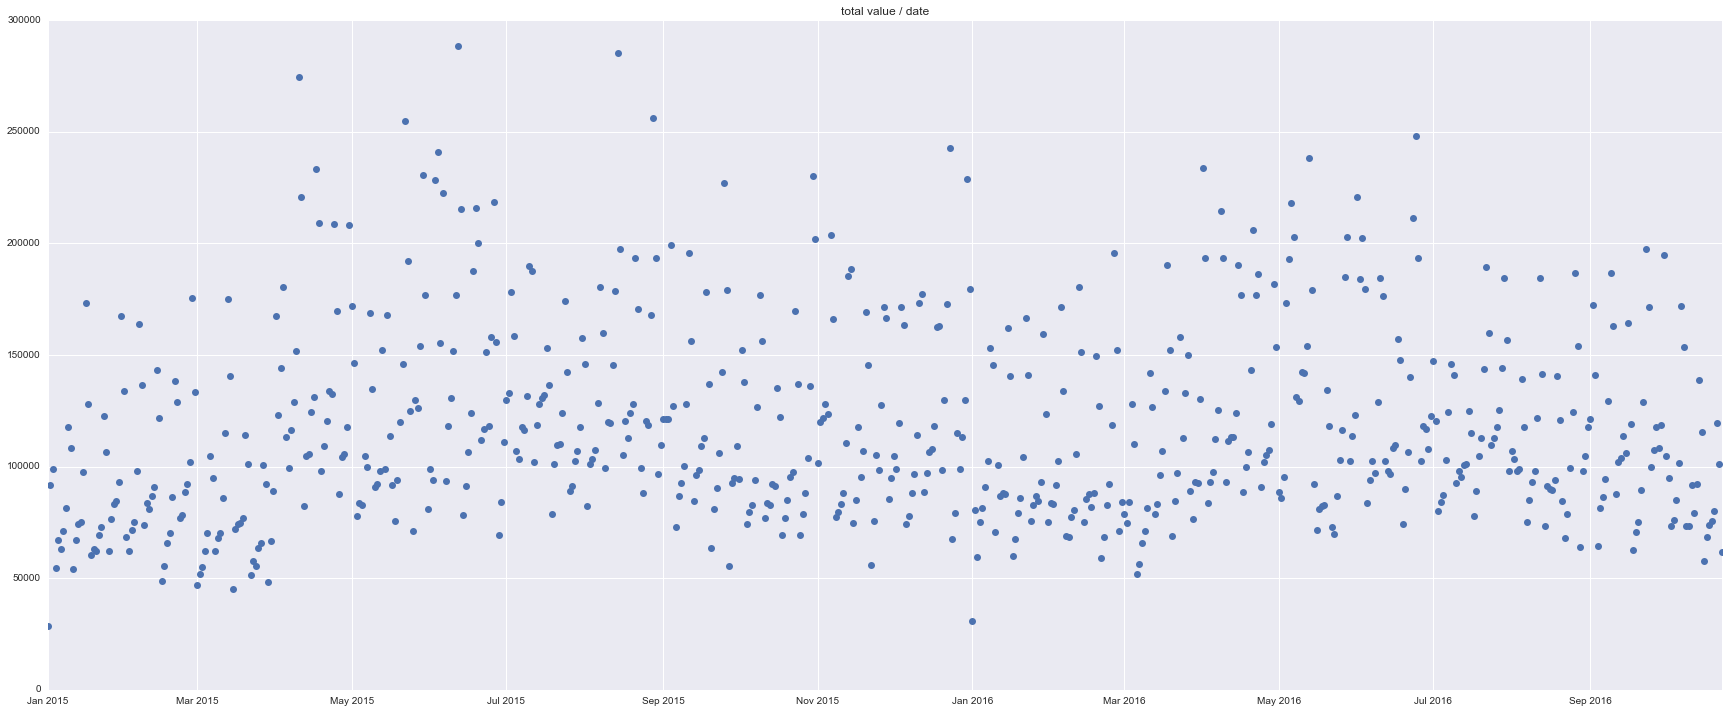

In [202]:
df_area = aggregated_data[ aggregated_data['station'] == 618800 ]

plt.figure(figsize=(30,12))
plt.plot_date(df_area['date'] , df_area['oms'] )
plt.title("total value / date")
plt.show()

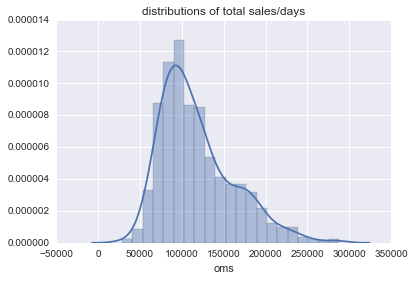

In [203]:
sns.distplot(df_area['oms'])
plt.title('distributions of total sales/days')
plt.plot()
print

## let's use quartiles

In [215]:
Q20 = np.percentile(df_area['oms'], 20)
Q80 = np.percentile(df_area['oms'], 80)
print Q33,Q66
 
def perf2cat(x):
    """
    create a category for a given day 
    """
    if x < Q20:
        return "bad day"
    elif x < Q80:
        return "normal day"
    else:
        return "good day"
df_area['revenue'] = df_area['oms'].map(perf2cat)

92178.1162 124778.0042


/Users/valentin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[]

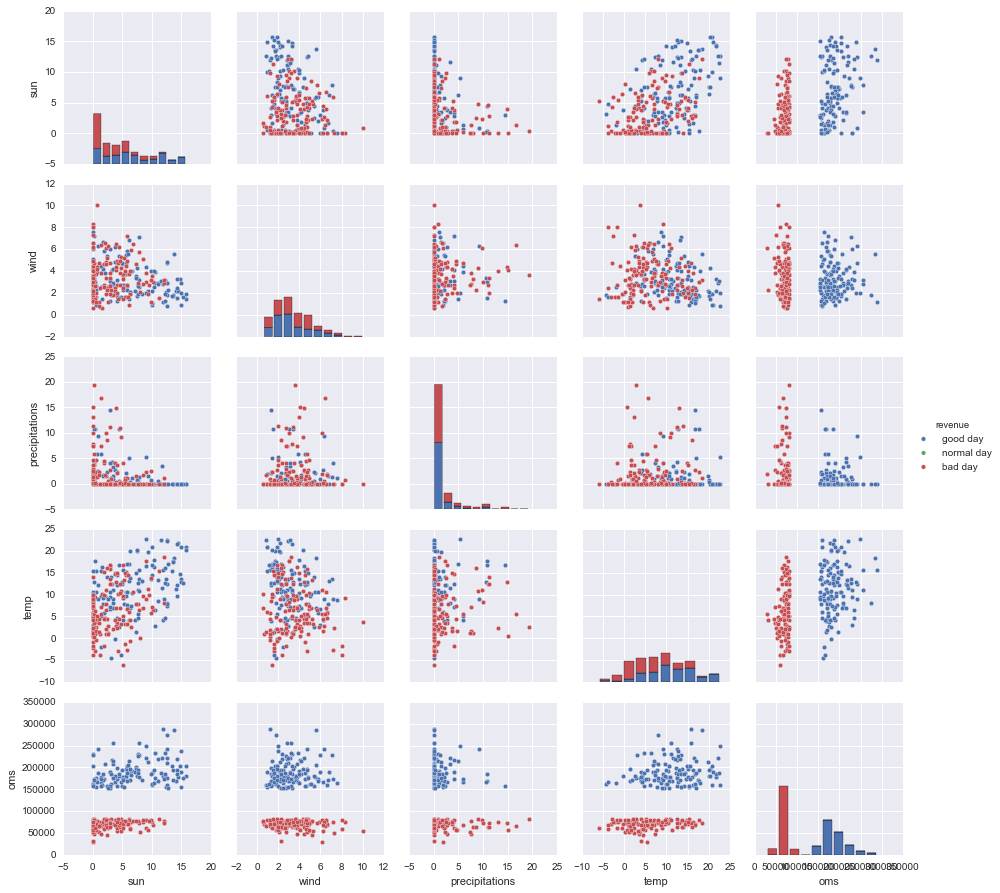

In [217]:
dat = df_area[ df_area['revenue'] != 'normal day' ]
cols = ['sun','wind','precipitations', 'revenue','temp','oms']
sns.pairplot(dat[cols], hue="revenue", hue_order=['good day' , 'normal day','bad day'])
plt.plot()

Here , we keep only the bad and good days, sales-wize. 

Temperature seem to influence the probability of good days. While a sunny seems to increase sales, a rainny day seems to increase it too!

Wind seems to have a little infuence

[]

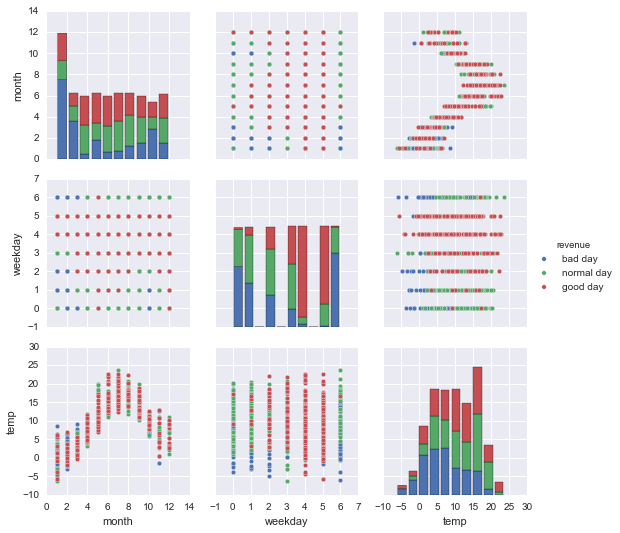

In [213]:
cols = ['month','weekday', 'revenue','temp']
sns.pairplot(df_area[cols], hue="revenue")
plt.plot()

but months and temperature are highly correlated and the company is already able to forecast sales based on the annual trend. Therefore we should aim to look at the small variation compared to this general trend instead. But First, let's try to model this simple trend.

### Build a simple model